# Linear Regression Model to Predict Life Expectancy

### Generate Model Trained and Tested Randomly

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump, load

In [3]:
# read in data file
data = pd.read_csv('Data/Derived/final_data.csv')
data.head()

,state,year,quartile,gender,LE
0,al,2001,1,female,80.977432
1,al,2002,1,female,81.550888
2,al,2003,1,female,80.669098
3,al,2004,1,female,82.787102
4,al,2005,1,female,81.994995


In [4]:
# identify independent and dependent variables 
X = data[['state', 'year', 'quartile', 'gender']]
y = data['LE'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5712, 4) (5712, 1)


In [5]:
# convert categorical variables to binary
X = pd.get_dummies(X, columns=['state', 'gender'])

# separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,year,quartile,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,gender_female,gender_male
479,2004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4202,2003,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4727,2010,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2215,2004,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1867,2006,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# scale data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Kanika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


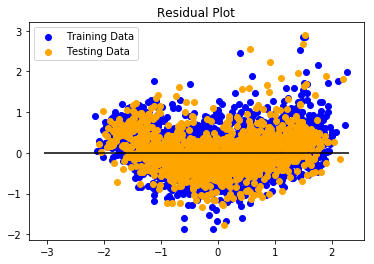

In [7]:
# plot the results
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [77]:
train_predictions = model.predict(X_train_scaled)
training_mse = mean_squared_error(y_train_scaled, train_predictions)
train_r2 = model.score(X_train_scaled, y_train_scaled)

test_predictions = model.predict(X_test_scaled)
testing_mse = mean_squared_error(y_test_scaled, test_predictions)
test_r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Training MSE: {training_mse}, Training R2: {train_r2}")
print(f"Testing MSE: {testing_mse}, Testing R2: {test_r2}")

Training MSE: 0.2007051164457062, Training R2: 0.7992948835542938
Testing MSE: 0.23173310859021998, Testing R2: 0.7707976555734117


In [58]:
model.coef_

array([[ 1.46595633e-01,  7.06134602e-01,  7.91631866e+11,
         7.86999337e+11,  8.05356355e+11,  7.58561153e+11,
         7.82337107e+11,  8.14366622e+11,  7.48822825e+11,
         7.72921390e+11,  8.18831322e+11,  7.91631866e+11,
         7.43902275e+11,  8.09875116e+11,  8.14366622e+11,
         7.82337107e+11,  7.96235212e+11,  7.77644641e+11,
         8.00809879e+11,  8.05356355e+11,  7.91631866e+11,
         8.14366622e+11,  7.86999337e+11,  8.14366622e+11,
         8.05356355e+11,  8.18831322e+11,  8.14366622e+11,
         7.91631866e+11,  8.23269652e+11,  7.68166786e+11,
         7.63380241e+11,  7.28926742e+11,  8.09875116e+11,
         8.14366622e+11,  8.05356355e+11,  7.72921390e+11,
         7.53708896e+11,  8.00809879e+11,  7.96235212e+11,
         7.68166786e+11,  7.86999337e+11,  7.58561153e+11,
         7.58561153e+11,  7.77644641e+11,  8.09875116e+11,
         8.14366622e+11,  8.00809879e+11,  7.77644641e+11,
         8.00809879e+11,  8.23269652e+11,  8.23269652e+1

### Generate Model Trained on Earlier Years and Tested on Later Years

In [47]:
# identify independent and dependent variables 
X2 = data[['state', 'year', 'quartile', 'gender']]
y2 = data['LE'].values.reshape(-1, 1)
print(X2.shape, y2.shape)

(5712, 4) (5712, 1)


In [48]:
# read in data file
data2 = pd.read_csv('Data/Derived/final_data.csv')
data2.head()

,state,year,quartile,gender,LE
0,al,2001,1,female,80.977432
1,al,2002,1,female,81.550888
2,al,2003,1,female,80.669098
3,al,2004,1,female,82.787102
4,al,2005,1,female,81.994995


In [49]:
# convert categorical variables to binary
X2 = pd.get_dummies(X2, columns=['state', 'gender'])

# sort by year
X2 = X2.sort_values(by=['year'])
X2.head()

,year,quartile,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,gender_female,gender_male
0,2001,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1638,2001,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3136,2001,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4606,2001,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1624,2001,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# separate training and testing data

train_pct_index = int(0.75 * len(X2))
X2_train, X2_test = X2[:train_pct_index], X2[train_pct_index:]
y2_train, y2_test = y2[:train_pct_index], y2[train_pct_index:]

X2_train.head()

,year,quartile,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,gender_female,gender_male
0,2001,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1638,2001,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3136,2001,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4606,2001,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1624,2001,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
# scale data
X2_scaler = StandardScaler().fit(X2_train)
y2_scaler = StandardScaler().fit(y2_train)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)
y2_train_scaled = y2_scaler.transform(y2_train)
y2_test_scaled = y2_scaler.transform(y2_test)

C:\Users\Kanika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


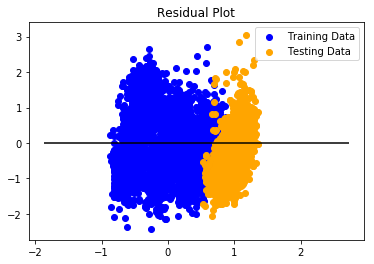

In [55]:
# plot the results
model2 = LinearRegression()
model2.fit(X2_train_scaled, y2_train_scaled)
plt.scatter(model2.predict(X2_train_scaled), model2.predict(X2_train_scaled) - y2_train_scaled, c="blue", label="Training Data")
plt.scatter(model2.predict(X2_test_scaled), model2.predict(X2_test_scaled) - y2_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y2_test_scaled.min(), xmax=y2_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [57]:
train_predictions2 = model2.predict(X2_train_scaled)
training_mse2 = mean_squared_error(y2_train_scaled, train_predictions2)
train_r2_b = model2.score(X2_train_scaled, y2_train_scaled)

test_predictions2 = model2.predict(X2_test_scaled)
testing_mse2 = mean_squared_error(y2_test_scaled, test_predictions2)
test_r2_b = model2.score(X2_test_scaled, y2_test_scaled)

print(f"Training MSE: {training_mse2}, Training R2: {train_r2_b}")
print(f"Testing MSE: {testing_mse2}, Testing R2: {test_r2_b}")

Training MSE: 0.8131114331489625, Training R2: 0.18688856685103739
Testing MSE: 0.5255167528387955, Testing R2: -0.38713237412644874


### Generate Model Without State Data, Trained and Tested Randomly

In [69]:
# read in data file
data3 = pd.read_csv('Data/Derived/final_data.csv')
data3 = data3.drop(columns=['state'])
data3.head()

,year,quartile,gender,LE
0,2001,1,female,80.977432
1,2002,1,female,81.550888
2,2003,1,female,80.669098
3,2004,1,female,82.787102
4,2005,1,female,81.994995


In [71]:
# identify independent and dependent variables 
X3 = data3[['year', 'quartile', 'gender']]
y3 = data3['LE'].values.reshape(-1, 1)
print(X3.shape, y3.shape)

(5712, 3) (5712, 1)


In [72]:
# convert categorical variables to binary
X3 = pd.get_dummies(X3, columns=['gender'])

# separate training and testing data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0)
X3_train.head()

,year,quartile,gender_female,gender_male
479,2004,1,1,0
4202,2003,3,0,1
4727,2010,4,1,0
2215,2004,2,0,1
1867,2006,2,1,0


In [73]:
# scale data
X3_scaler = StandardScaler().fit(X3_train)
y3_scaler = StandardScaler().fit(y3_train)

X3_train_scaled = X3_scaler.transform(X3_train)
X3_test_scaled = X3_scaler.transform(X3_test)
y3_train_scaled = y3_scaler.transform(y3_train)
y3_test_scaled = y3_scaler.transform(y3_test)

C:\Users\Kanika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


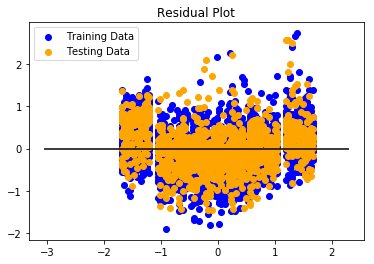

In [74]:
# plot the results
model3 = LinearRegression()
model3.fit(X3_train_scaled, y3_train_scaled)
plt.scatter(model3.predict(X3_train_scaled), model3.predict(X3_train_scaled) - y3_train_scaled, c="blue", label="Training Data")
plt.scatter(model3.predict(X3_test_scaled), model3.predict(X3_test_scaled) - y3_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y3_test_scaled.min(), xmax=y3_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [75]:
train_predictions3 = model3.predict(X3_train_scaled)
training_mse3 = mean_squared_error(y3_train_scaled, train_predictions3)
train_r2_c = model3.score(X3_train_scaled, y3_train_scaled)

test_predictions3 = model3.predict(X3_test_scaled)
testing_mse3 = mean_squared_error(y3_test_scaled, test_predictions3)
test_r2_c = model3.score(X3_test_scaled, y3_test_scaled)

print(f"Training MSE: {training_mse3}, Training R2: {train_r2_c}")
print(f"Testing MSE: {testing_mse3}, Testing R2: {test_r2_c}")

Training MSE: 0.23395911208550116, Training R2: 0.7660408879144989
Testing MSE: 0.25714771625477056, Testing R2: 0.7456606015942258


In [76]:
model3.coef_

array([[ 0.14746738,  0.70514198,  0.24877063, -0.24877063]])

### Export Models and Scalers

In [79]:
# export model 1
production = LinearRegression()
production.fit(X_train_scaled, y_train)
dump(production, 'models/state_model.joblib')
dump(X_scaler, 'models/state_model_scaler.joblib')

['models/state_model_scaler.joblib']

In [82]:
# export model 3
production2 = LinearRegression()
production2.fit(X3_train_scaled, y3_train)
dump(production2, 'models/nost_model.joblib')
dump(X3_scaler, 'models/nost_model_scaler.joblib')

['models/nost_model_scaler.joblib']